# Predicción de precios de laptops

Descripción del proyecto

Este proyecto tiene como objetivo predicir el precio de laptops utilizando diferentes modelos de machine learning, como Regresión lineal, Random Forest, XGBoost, LightLGB, Catboost.


## 1. CARGA Y EXPLORACIÓN DE DATOS

In [1]:
#Importación de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Carga de datos
df = pd.read_csv('/content/drive/MyDrive/Data_Proyectos/laptop_prices.csv')

In [3]:
# Vemos los primeros registros
df.head()

,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Operating System,Price ($)
0,Apple,AMD Ryzen 3,64,512GB SSD,Nvidia GTX 1650,17.3,2560x1440,8.9,1.42,FreeDOS,3997.07
1,Razer,AMD Ryzen 7,4,1TB SSD,Nvidia RTX 3080,14.0,1366x768,9.4,2.57,Linux,1355.78
2,Asus,Intel i5,32,2TB SSD,Nvidia RTX 3060,13.3,3840x2160,8.5,1.74,FreeDOS,2673.07
3,Lenovo,Intel i5,4,256GB SSD,Nvidia RTX 3080,13.3,1366x768,10.5,3.10,Windows,751.17
4,Razer,Intel i3,4,256GB SSD,AMD Radeon RX 6600,16.0,3840x2160,5.7,3.38,Linux,2059.83


In [4]:
# Mostramos los nombres de las columnas
df.columns

Index(['Brand', 'Processor', 'RAM (GB)', 'Storage', 'GPU',
       'Screen Size (inch)', 'Resolution', 'Battery Life (hours)',
       'Weight (kg)', 'Operating System', 'Price ($)'],
      dtype='object')

In [5]:
# Numeros de filas y columnas
df.shape

(11768, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11768 entries, 0 to 11767
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Brand                 11768 non-null  object 
 1   Processor             11768 non-null  object 
 2   RAM (GB)              11768 non-null  int64  
 3   Storage               11768 non-null  object 
 4   GPU                   11768 non-null  object 
 5   Screen Size (inch)    11768 non-null  float64
 6   Resolution            11768 non-null  object 
 7   Battery Life (hours)  11768 non-null  float64
 8   Weight (kg)           11768 non-null  float64
 9   Operating System      11768 non-null  object 
 10  Price ($)             11768 non-null  float64
dtypes: float64(4), int64(1), object(6)
memory usage: 1011.4+ KB


In [7]:
# Mostramos las estadisticas basicas de las variables numericas
df.describe()

,RAM (GB),Screen Size (inch),Battery Life (hours),Weight (kg),Price ($)
count,11768.000000,11768.000000,11768.000000,11768.000000,11768.000000
mean,24.852821,15.212305,8.027855,2.341117,2183.571608
std,21.762567,1.436997,2.305400,0.667921,1316.886132
min,4.000000,13.300000,4.000000,1.200000,279.570000
25%,8.000000,14.000000,6.000000,1.760000,1272.045000
50%,16.000000,15.600000,8.000000,2.340000,1840.865000
75%,32.000000,16.000000,10.000000,2.910000,2698.370000
max,64.000000,17.300000,12.000000,3.500000,10807.880000


In [8]:
# Mostramos las estadisticas basicas de las variables categoricas
df.describe(include='object')

,Brand,Processor,Storage,GPU,Resolution,Operating System
count,11768,11768,11768,11768,11768,11768
unique,10,8,5,7,4,4
top,Apple,Intel i3,512GB SSD,Nvidia RTX 2060,3840x2160,Windows
freq,1262,1570,2420,1746,2977,2954


In [9]:
# Vemos la cantidad de categorias unicas de las variables
df.nunique()

,0
Brand,10
Processor,8
RAM (GB),5
Storage,5
GPU,7
Screen Size (inch),5
Resolution,4
Battery Life (hours),81
Weight (kg),231
Operating System,4


In [10]:
# Vemos el numero de valores unicos
for col in df.columns:
  if df[col].nunique() < 11:
    print('---------------------------------------')
    print(f'{df[col].value_counts()}')

---------------------------------------
Brand
Apple        1262
HP           1208
MSI          1190
Microsoft    1175
Dell         1170
Asus         1165
Acer         1165
Samsung      1163
Lenovo       1145
Razer        1125
Name: count, dtype: int64
---------------------------------------
Processor
Intel i3       1570
Intel i7       1509
AMD Ryzen 3    1500
AMD Ryzen 9    1472
Intel i9       1456
Intel i5       1429
AMD Ryzen 5    1422
AMD Ryzen 7    1410
Name: count, dtype: int64
---------------------------------------
RAM (GB)
32    2410
16    2361
4     2361
64    2340
8     2296
Name: count, dtype: int64
---------------------------------------
Storage
512GB SSD    2420
2TB SSD      2415
256GB SSD    2318
1TB SSD      2313
1TB HDD      2302
Name: count, dtype: int64
---------------------------------------
GPU
Nvidia RTX 2060       1746
Nvidia GTX 1650       1698
Nvidia RTX 3060       1679
AMD Radeon RX 6600    1676
AMD Radeon RX 6800    1669
Integrated            1653
Nvidia RTX 3

## 2.  ANALISIS EXPLORATORIO DE DATOS (EDA)


### Detección de valores nulos y duplicados

In [11]:
# Observamos el porcentaje de valores nulos
df.isnull().mean() * 100

,0
Brand,0.0
Processor,0.0
RAM (GB),0.0
Storage,0.0
GPU,0.0
Screen Size (inch),0.0
Resolution,0.0
Battery Life (hours),0.0
Weight (kg),0.0
Operating System,0.0


In [12]:
# Vemos la cantidad de valores duplicados
df.duplicated().sum()

np.int64(0)

### Analisis univariados

#### CATEGORICOS

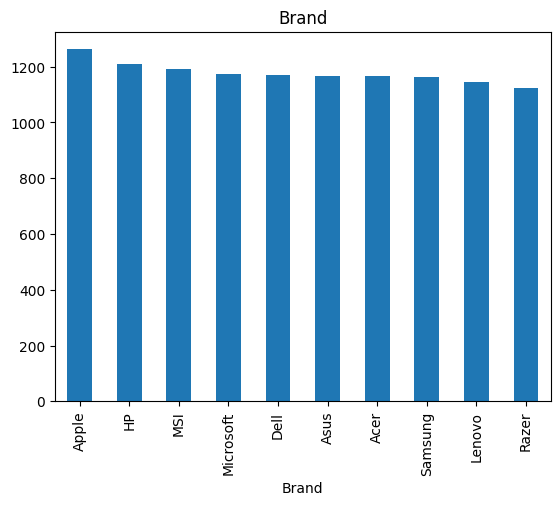

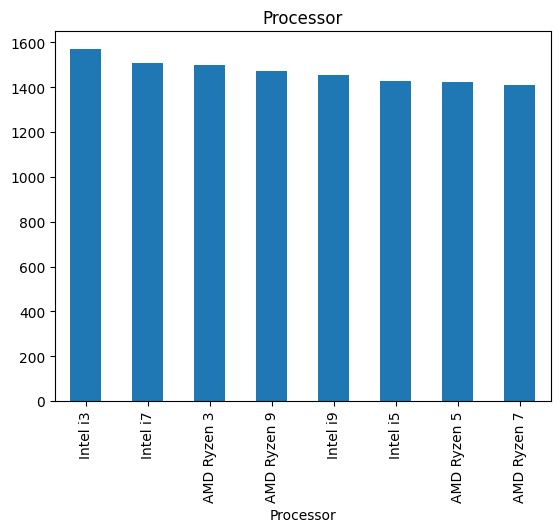

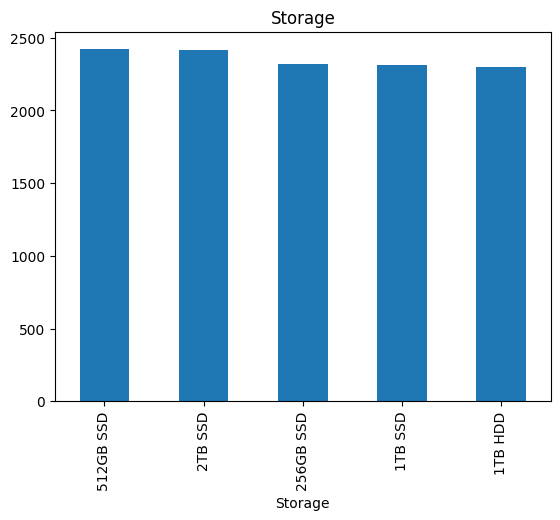

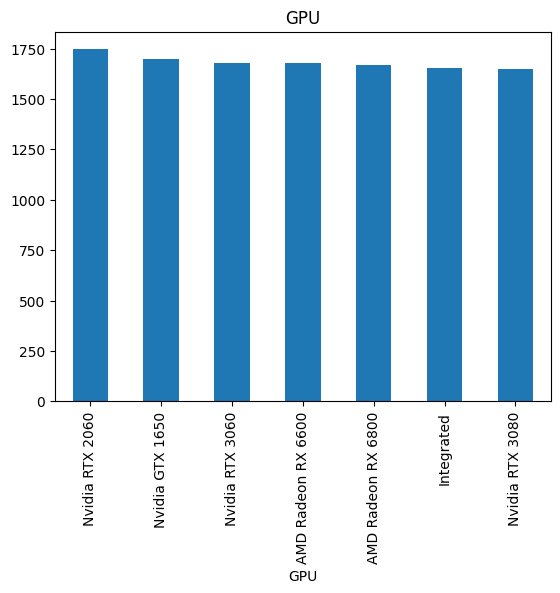

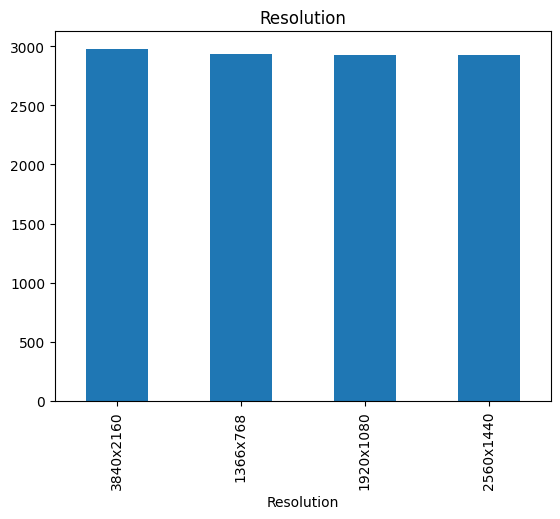

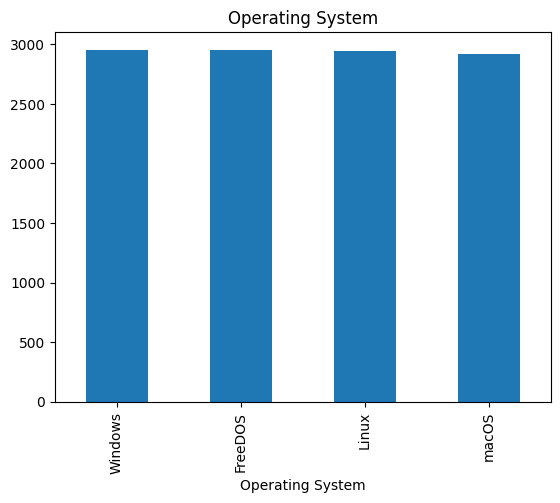

In [13]:
# Graficos de barras para los categoricos
col_cat = df.select_dtypes(include='object').columns

for col in col_cat:
  df[col].value_counts().plot(kind='bar')
  plt.title(col)
  plt.show()

#### NUMERICOS

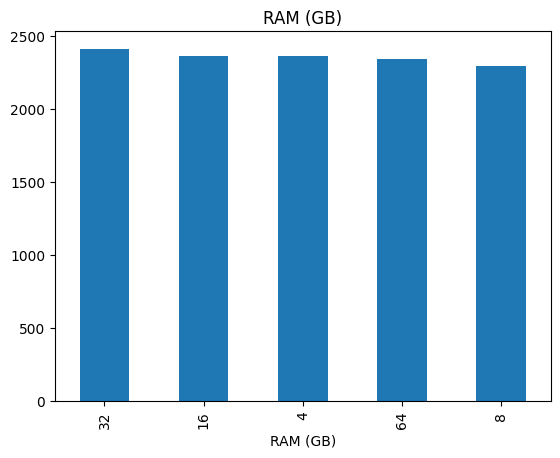

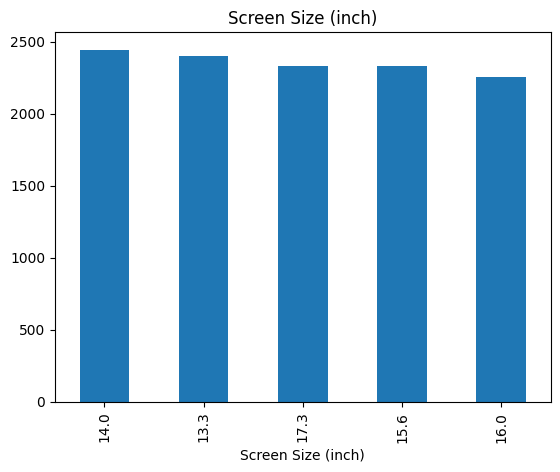

In [14]:
# Graficas para las variables numericas
otros_bar = ['RAM (GB)', 'Screen Size (inch)']

for col in otros_bar:
  df[col].value_counts().plot(kind='bar')
  plt.title(col)
  plt.show()


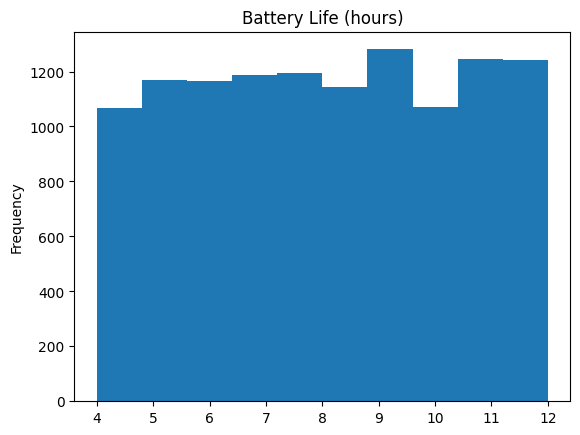

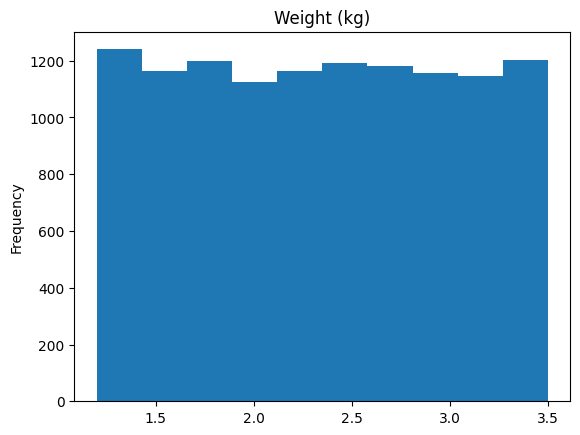

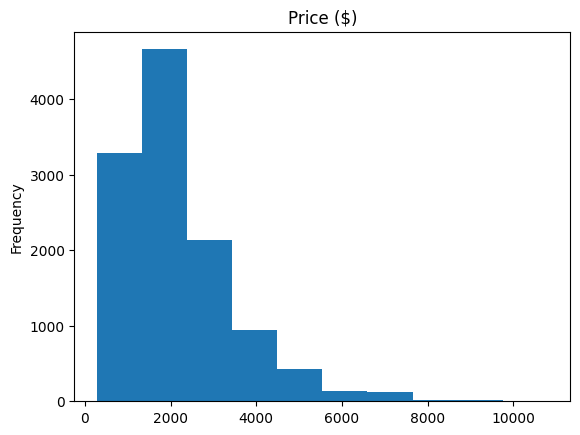

In [15]:
# Grafica de histograma para las numericas
col_hist = [ 'Battery Life (hours)', 'Weight (kg)', 'Price ($)']
for col in col_hist:
  df[col].plot(kind='hist')
  plt.title(col)
  plt.show()

### Analisis bivariados

In [16]:
# Creamos una variable solo con las variables numericas sin el target
col_scat = df.select_dtypes(include='number').columns.tolist()
col_scat = col_scat[:-1]

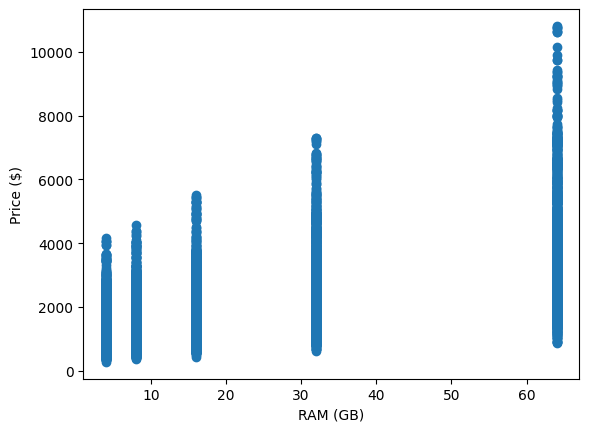

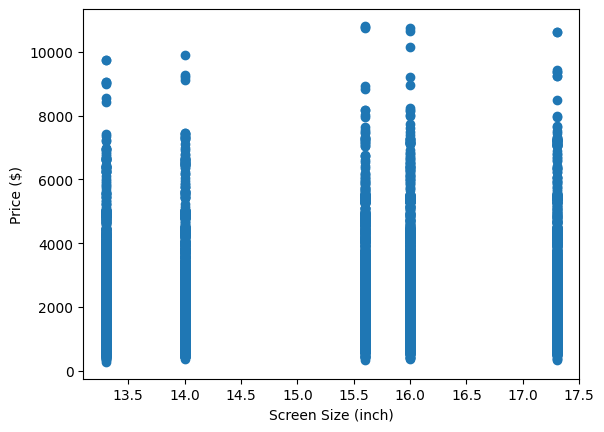

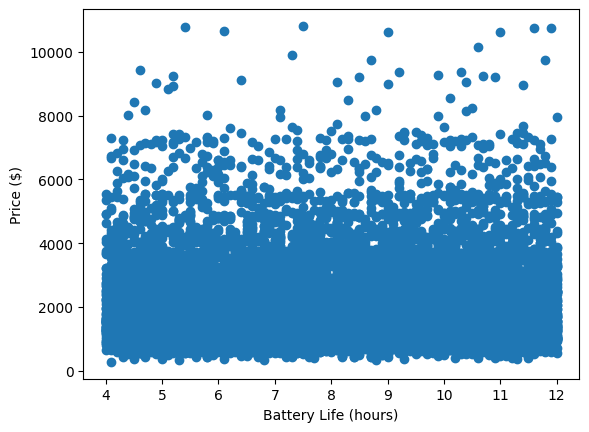

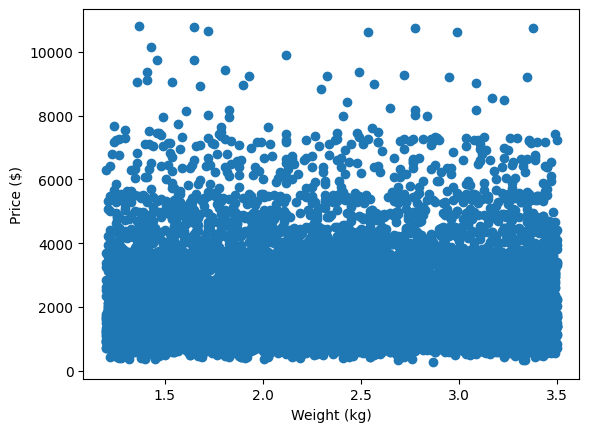

In [17]:
# Creamos la grafica de scatterplot
for col in col_scat:
  plt.scatter(df[col], df['Price ($)'])
  plt.xlabel(col)
  plt.ylabel('Price ($)')
  plt.show()

## 3.  PREPROCESAMIENTO DE DATOS

### Seleccionando caracteristicas

In [18]:
from scipy.stats import pearsonr, spearmanr

#### Para las variables numericas

Para seleccionar las variables numéricas más relevantes, utilicé dos métodos estadísticos: el test de correlación de Pearson y el de Spearman.

##### PEARSON

In [19]:
for col in col_scat:
  corr, p_value = pearsonr(df[col], df['Price ($)'])
  print('-----------------------------------------------------')
  print(f'La correlación de Pearson entre {col} y Price ($)')
  print(f"Correlación de Pearson: {corr}")
  print(f"P-valor: {p_value}")
  if p_value < 0.05:
    print('Rechazamos la hipotesis nula')
  else:
    print('NO Rechazamos la hipotesis nula')

-----------------------------------------------------
La correlación de Pearson entre RAM (GB) y Price ($)
Correlación de Pearson: 0.6162214056038406
P-valor: 0.0
Rechazamos la hipotesis nula
-----------------------------------------------------
La correlación de Pearson entre Screen Size (inch) y Price ($)
Correlación de Pearson: 0.0698287999740738
P-valor: 3.363294587576691e-14
Rechazamos la hipotesis nula
-----------------------------------------------------
La correlación de Pearson entre Battery Life (hours) y Price ($)
Correlación de Pearson: 0.009777607983415327
P-valor: 0.28887552785105663
NO Rechazamos la hipotesis nula
-----------------------------------------------------
La correlación de Pearson entre Weight (kg) y Price ($)
Correlación de Pearson: 0.0024312520769084385
P-valor: 0.7919990717136636
NO Rechazamos la hipotesis nula


##### SPEARMAN

In [20]:
for col in col_scat:
  corr_p, p_value_p = spearmanr(df[col], df['Price ($)'])
  print('-----------------------------------------------------')
  print(f'La correlación de Spearman entre {col} y Price ($)')
  print(f"Correlación de Pearson: {corr_p}")
  print(f"P-valor: {p_value_p}")
  if p_value_p < 0.05:
    print('Rechazamos la hipotesis nula')
  else:
    print('NO Rechazamos la hipotesis nula')

-----------------------------------------------------
La correlación de Spearman entre RAM (GB) y Price ($)
Correlación de Pearson: 0.6135349245025883
P-valor: 0.0
Rechazamos la hipotesis nula
-----------------------------------------------------
La correlación de Spearman entre Screen Size (inch) y Price ($)
Correlación de Pearson: 0.07447960394218266
P-valor: 5.968560375200573e-16
Rechazamos la hipotesis nula
-----------------------------------------------------
La correlación de Spearman entre Battery Life (hours) y Price ($)
Correlación de Pearson: 0.004135841470114775
P-valor: 0.6537115394773695
NO Rechazamos la hipotesis nula
-----------------------------------------------------
La correlación de Spearman entre Weight (kg) y Price ($)
Correlación de Pearson: 0.0036708190799974037
P-valor: 0.6905041330922823
NO Rechazamos la hipotesis nula


In [21]:
df.drop(columns=['Battery Life (hours)', 'Weight (kg)'], inplace=True)

#### Para las variables categoricas

Para la selección de las variables categoricas utilice el metstadistico de Kruskal - Wallis

##### KRUSKAL y WALLIS

In [22]:
from scipy.stats import shapiro

stat, p_value = shapiro(df['Price ($)'])

if p_value < 0.05:
    print("La variable no sigue una distribución normal.")
else:
    print("La variable sigue una distribución normal.")


La variable no sigue una distribución normal.


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 11768.
  res = hypotest_fun_out(*samples, **kwds)


In [23]:
from scipy.stats import kruskal

In [24]:
df.select_dtypes(include='object').columns

Index(['Brand', 'Processor', 'Storage', 'GPU', 'Resolution',
       'Operating System'],
      dtype='object')

In [25]:
categ = ['Brand', 'Processor', 'Storage', 'GPU', 'Resolution', 'Operating System']
for col in categ:
  lista_cat = df[col].value_counts().index.tolist()

  print('\n')
  mi_lista = list()
  for i, cat in enumerate(lista_cat):

    print(f"grupo{i} = df[df['{col}'] == '{cat}']['Price ($)']")

    mi_lista.append(f'grupo{i}')

  print(f'stat_{col}, p_value_{col} = kruskal({mi_lista})')
  print(f'print(f"Estadístico de Kruskal-Wallis({col}): stat: {{stat_{col}}}, p-valor: {{p_value_{col}}}")')
  print(f"if p_value_{col} < 0.05:\n  print('Rechazamos la hipotesis nula')\nelse:\n  print('NO Rechazamos la hipotesis nula')")
  print('')




grupo0 = df[df['Brand'] == 'Apple']['Price ($)']
grupo1 = df[df['Brand'] == 'HP']['Price ($)']
grupo2 = df[df['Brand'] == 'MSI']['Price ($)']
grupo3 = df[df['Brand'] == 'Microsoft']['Price ($)']
grupo4 = df[df['Brand'] == 'Dell']['Price ($)']
grupo5 = df[df['Brand'] == 'Asus']['Price ($)']
grupo6 = df[df['Brand'] == 'Acer']['Price ($)']
grupo7 = df[df['Brand'] == 'Samsung']['Price ($)']
grupo8 = df[df['Brand'] == 'Lenovo']['Price ($)']
grupo9 = df[df['Brand'] == 'Razer']['Price ($)']
stat_Brand, p_value_Brand = kruskal(['grupo0', 'grupo1', 'grupo2', 'grupo3', 'grupo4', 'grupo5', 'grupo6', 'grupo7', 'grupo8', 'grupo9'])
print(f"Estadístico de Kruskal-Wallis(Brand): stat: {stat_Brand}, p-valor: {p_value_Brand}")
if p_value_Brand < 0.05:
  print('Rechazamos la hipotesis nula')
else:
  print('NO Rechazamos la hipotesis nula')



grupo0 = df[df['Processor'] == 'Intel i3']['Price ($)']
grupo1 = df[df['Processor'] == 'Intel i7']['Price ($)']
grupo2 = df[df['Processor'] == 'AMD Ryzen 3']['Pr

In [26]:
grupo0 = df[df['Brand'] == 'Apple']['Price ($)']
grupo1 = df[df['Brand'] == 'HP']['Price ($)']
grupo2 = df[df['Brand'] == 'MSI']['Price ($)']
grupo3 = df[df['Brand'] == 'Microsoft']['Price ($)']
grupo4 = df[df['Brand'] == 'Dell']['Price ($)']
grupo5 = df[df['Brand'] == 'Asus']['Price ($)']
grupo6 = df[df['Brand'] == 'Acer']['Price ($)']
grupo7 = df[df['Brand'] == 'Samsung']['Price ($)']
grupo8 = df[df['Brand'] == 'Lenovo']['Price ($)']
grupo9 = df[df['Brand'] == 'Razer']['Price ($)']
stat_Brand, p_value_Brand = kruskal(grupo0, grupo1, grupo2, grupo3, grupo4, grupo5, grupo6, grupo7, grupo8, grupo9)
print(f"Estadístico de Kruskal-Wallis(Brand): stat: {stat_Brand}, p-valor: {p_value_Brand}")
if p_value_Brand < 0.05:
  print('Rechazamos la hipotesis nula')
  print('\n--------------------')
else:
  print('NO Rechazamos la hipotesis nula')
  print('\n--------------------')

grupo0 = df[df['Processor'] == 'Intel i3']['Price ($)']
grupo1 = df[df['Processor'] == 'Intel i7']['Price ($)']
grupo2 = df[df['Processor'] == 'AMD Ryzen 3']['Price ($)']
grupo3 = df[df['Processor'] == 'AMD Ryzen 9']['Price ($)']
grupo4 = df[df['Processor'] == 'Intel i9']['Price ($)']
grupo5 = df[df['Processor'] == 'Intel i5']['Price ($)']
grupo6 = df[df['Processor'] == 'AMD Ryzen 5']['Price ($)']
grupo7 = df[df['Processor'] == 'AMD Ryzen 7']['Price ($)']
stat_Processor, p_value_Processor = kruskal(grupo0, grupo1, grupo2, grupo3, grupo4, grupo5, grupo6, grupo7)
print(f"Estadístico de Kruskal-Wallis(Processor): stat: {stat_Processor}, p-valor: {p_value_Processor}")
if p_value_Processor < 0.05:
  print('Rechazamos la hipotesis nula')
  print('\n--------------------')
else:
  print('NO Rechazamos la hipotesis nula')
  print('\n--------------------')

grupo0 = df[df['Storage'] == '512GB SSD']['Price ($)']
grupo1 = df[df['Storage'] == '2TB SSD']['Price ($)']
grupo2 = df[df['Storage'] == '256GB SSD']['Price ($)']
grupo3 = df[df['Storage'] == '1TB SSD']['Price ($)']
grupo4 = df[df['Storage'] == '1TB HDD']['Price ($)']
stat_Storage, p_value_Storage = kruskal(grupo0, grupo1, grupo2, grupo3, grupo4)
print(f"Estadístico de Kruskal-Wallis(Storage): stat: {stat_Storage}, p-valor: {p_value_Storage}")
if p_value_Storage < 0.05:
  print('Rechazamos la hipotesis nula')
  print('\n--------------------')
else:
  print('NO Rechazamos la hipotesis nula')
  print('\n--------------------')

grupo0 = df[df['GPU'] == 'Nvidia RTX 2060']['Price ($)']
grupo1 = df[df['GPU'] == 'Nvidia GTX 1650']['Price ($)']
grupo2 = df[df['GPU'] == 'Nvidia RTX 3060']['Price ($)']
grupo3 = df[df['GPU'] == 'AMD Radeon RX 6600']['Price ($)']
grupo4 = df[df['GPU'] == 'AMD Radeon RX 6800']['Price ($)']
grupo5 = df[df['GPU'] == 'Integrated']['Price ($)']
grupo6 = df[df['GPU'] == 'Nvidia RTX 3080']['Price ($)']
stat_GPU, p_value_GPU = kruskal(grupo0, grupo1, grupo2, grupo3, grupo4, grupo5,grupo6)
print(f"Estadístico de Kruskal-Wallis(GPU): stat: {stat_GPU}, p-valor: {p_value_GPU}")
if p_value_GPU < 0.05:
  print('Rechazamos la hipotesis nula')
  print('\n--------------------')
else:
  print('NO Rechazamos la hipotesis nula')
  print('\n--------------------')

grupo0 = df[df['Resolution'] == '3840x2160']['Price ($)']
grupo1 = df[df['Resolution'] == '1366x768']['Price ($)']
grupo2 = df[df['Resolution'] == '1920x1080']['Price ($)']
grupo3 = df[df['Resolution'] == '2560x1440']['Price ($)']
stat_Resolution, p_value_Resolution = kruskal(grupo0, grupo1, grupo2, grupo3)
print(f"Estadístico de Kruskal-Wallis(Resolution): stat: {stat_Resolution}, p-valor: {p_value_Resolution}")
if p_value_Resolution < 0.05:
  print('Rechazamos la hipotesis nula')
  print('\n--------------------')
else:
  print('NO Rechazamos la hipotesis nula')
  print('\n--------------------')

grupo0 = df[df['Operating System'] == 'Windows']['Price ($)']
grupo1 = df[df['Operating System'] == 'FreeDOS']['Price ($)']
grupo2 = df[df['Operating System'] == 'Linux']['Price ($)']
grupo3 = df[df['Operating System'] == 'macOS']['Price ($)']
stat_Operating_System, p_value_Operating_System = kruskal(grupo0, grupo1, grupo2, grupo3)
print(f"Estadístico de Kruskal-Wallis(Operating System): stat: {stat_Operating_System}, p-valor: {p_value_Operating_System}")
if p_value_Operating_System < 0.05:
  print('Rechazamos la hipotesis nula')
  print('\n--------------------')
else:
  print('NO Rechazamos la hipotesis nula')
  print('\n--------------------')

Estadístico de Kruskal-Wallis(Brand): stat: 829.3067852731853, p-valor: 1.0429082438960252e-172
Rechazamos la hipotesis nula

--------------------
Estadístico de Kruskal-Wallis(Processor): stat: 2528.1844071599667, p-valor: 0.0
Rechazamos la hipotesis nula

--------------------
Estadístico de Kruskal-Wallis(Storage): stat: 166.34241078431901, p-valor: 6.373353267377681e-35
Rechazamos la hipotesis nula

--------------------
Estadístico de Kruskal-Wallis(GPU): stat: 774.8009436787328, p-valor: 4.2819853225395894e-164
Rechazamos la hipotesis nula

--------------------
Estadístico de Kruskal-Wallis(Resolution): stat: 2369.0342826982237, p-valor: 0.0
Rechazamos la hipotesis nula

--------------------
Estadístico de Kruskal-Wallis(Operating System): stat: 0.430950881663487, p-valor: 0.9337771040653468
NO Rechazamos la hipotesis nula

--------------------


In [27]:
df.drop(columns='Operating System', inplace=True)

### Separación de los datos

In [28]:
# Libreria para la division de datos
from sklearn.model_selection import train_test_split

In [29]:
# Separamos los datos en variablea dependiente e independientes
x = df.drop(columns='Price ($)')
y = df['Price ($)']

In [30]:
# Dividimos los datos en train y validation
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.4, random_state=42)

In [31]:
# Dividimos los datos en test y validation
x_test, x_val, y_test, y_val = train_test_split(x_val, y_val, test_size=0.5, random_state=42)

### Escalado de variables numericas

In [32]:
# Importamos la libreria
from sklearn.preprocessing import MinMaxScaler

In [33]:
# Seleccionamos las caracteristicas numericas para su escalado
x_train_num = x_train.select_dtypes(include='number')
x_test_num = x_test.select_dtypes(include='number')
x_val_num = x_val.select_dtypes(include='number')

In [34]:
# Instanciamos el escalador
scaler = MinMaxScaler()

In [35]:
# Entrenamos el escalador
scaler.fit(x_train_num)

MinMaxScaler()

In [36]:
# Escalamos los datos
x_train_scaler = scaler.transform(x_train_num)
x_test_scaler = scaler.transform(x_test_num)
x_val_scaler = scaler.transform(x_val_num)

### Codificación de variables categoricas

In [37]:
# Importamos la libreria
from sklearn.preprocessing import OneHotEncoder

In [38]:
# Seleccionamos las variables categoricos
x_train_cat = x_train.select_dtypes(include='object')
x_test_cat = x_test.select_dtypes(include='object')
x_val_cat = x_val.select_dtypes(include='object')

In [39]:
# Instanciamos el codificador
encoder = OneHotEncoder(sparse_output=False)

In [40]:
# Entrenamos el codificadoe
encoder.fit(x_train_cat)

OneHotEncoder(sparse_output=False)

In [41]:
# codificamos las variables categoricos
x_train_encoder = encoder.transform(x_train_cat)
x_test_encoder = encoder.transform(x_test_cat)
x_val_encoder = encoder.transform(x_val_cat)

## 4. MODELO

### Regresion Lineal

In [42]:
# Importamos las librerias
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [43]:
# Concatenamos las variables codificadas y escaladas
x_train_final = np.concatenate([x_train_scaler, x_train_encoder], axis=1)
x_test_final = np.concatenate([x_test_scaler, x_test_encoder], axis=1)
x_val_final = np.concatenate([x_val_scaler, x_val_encoder], axis=1)

In [44]:
# Instanciamos el modelo
modelo = LinearRegression()

In [45]:
# Entrenamos el modelo
modelo.fit(x_train_final, y_train)

LinearRegression()

In [46]:
# Hacemos las predicciones
y_test_pred = modelo.predict(x_test_final)

In [47]:
# Evaluamos las metricas
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

In [48]:
# Imprimimos las metricas
print(f'RMSE: {np.sqrt(mse_test)}')
print(f'MSE: {mse_test}')
print(f'R2: {r2_test}')

RMSE: 477.1666053700059
MSE: 227687.96928033495
R2: 0.8751236275271477


#### DATOS DE VALIDACION

In [49]:
y_val_pred = modelo.predict(x_val_final)

In [50]:
mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

In [51]:
print(f'RMSE: {np.sqrt(mse_val)}')
print(f'MSE: {mse_val}')
print(f'R2: {r2_val}')

RMSE: 442.760556993204
MSE: 196036.91082893222
R2: 0.8859785955780761


### MODELOS BASADOS EN ARBOLES(Random Forest, XGBoost, LightLGB)

In [52]:
# Creamos los dataset para los modelos
x_train_encoder_ar = pd.DataFrame(x_train_encoder, columns=encoder.get_feature_names_out(x_train_cat.columns))
x_test_encoder_ar = pd.DataFrame(x_test_encoder, columns=encoder.get_feature_names_out(x_test_cat.columns))
x_val_encoder_ar = pd.DataFrame(x_val_encoder, columns=encoder.get_feature_names_out(x_val_cat.columns))

In [53]:
# Reseteamos sus indices
x_train_num_reset = x_train_num.reset_index(drop=True)
X_train_cat_reset = x_train_encoder_ar.reset_index(drop=True)

x_test_num_reset = x_test_num.reset_index(drop=True)
X_test_cat_reset = x_test_encoder_ar.reset_index(drop=True)

x_val_num_reset = x_val_num.reset_index(drop=True)
X_val_cat_reset = x_val_encoder_ar.reset_index(drop=True)

# Concatenamos los datos numericos y categoricos
X_trainfinal = pd.concat([x_train_num_reset, X_train_cat_reset], axis=1)
X_testfinal = pd.concat([x_test_num_reset, X_test_cat_reset], axis=1)
X_valfinal = pd.concat([x_val_num_reset, X_val_cat_reset], axis=1)

In [54]:
# Importación de las librerias
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb

In [55]:
# Instanciación de los modelos
model_rf = RandomForestRegressor()
model_xgb = xgb.XGBRegressor()
model_lgb = lgb.LGBMRegressor()

In [56]:
# Entrenamiento de los modelos
model_rf.fit(X_trainfinal, y_train)
model_xgb.fit(X_trainfinal, y_train)
model_lgb.fit(X_trainfinal, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000467 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 80
[LightGBM] [Info] Number of data points in the train set: 7060, number of used features: 36
[LightGBM] [Info] Start training from score 2170.716942


LGBMRegressor()

In [57]:
# Predicciones de los modelo
y_pred_test_rf = model_rf.predict(X_testfinal)
y_pred_test_xgb = model_xgb.predict(X_testfinal)
y_pred_test_lgb = model_lgb.predict(X_testfinal)

In [58]:
# Metricas
mse_test_rf = mean_squared_error(y_test, y_pred_test_rf)
mse_test_xgb = mean_squared_error(y_test, y_pred_test_xgb)
mse_test_lgb = mean_squared_error(y_test, y_pred_test_lgb)

r2_test_rf = r2_score(y_test, y_pred_test_rf)
r2_test_xgb = r2_score(y_test, y_pred_test_xgb)
r2_test_lgb = r2_score(y_test, y_pred_test_lgb)

In [59]:
# Mostramos los resultados
print(f'Random Forest')
print(f'RMSE: {np.sqrt(mse_test_rf)}')
print(f'MSE: {mse_test_rf}')
print(f'R2: {r2_test_rf}')

print('\nXGBoost')
print(f'RMSE: {np.sqrt(mse_test_xgb)}')
print(f'MSE: {mse_test_xgb}')
print(f'R2: {r2_test_xgb}')

print('\nLightGBM')
print(f'RMSE: {np.sqrt(mse_test_lgb)}')
print(f'MSE: {mse_test_lgb}')
print(f'R2: {r2_test_lgb}')


Random Forest
RMSE: 201.38484177287447
MSE: 40555.85449588569
R2: 0.9777569802744056

XGBoost
RMSE: 127.95321576785638
MSE: 16372.025425335609
R2: 0.9910206975291171

LightGBM
RMSE: 116.65101288942364
MSE: 13607.45880812848
R2: 0.9925369350875071


#### VALIDACION DE LOS MODELOS

In [60]:
# Predecimos con los datos de validación
y_pred_val_rf = model_rf.predict(X_valfinal)
y_pred_val_xgb = model_xgb.predict(X_valfinal)
y_pred_val_lgb = model_lgb.predict(X_valfinal)

In [61]:
# Creamos sus metricas
mse_val_rf = mean_squared_error(y_val, y_pred_val_rf)
mse_val_xgb = mean_squared_error(y_val, y_pred_val_xgb)
mse_val_lgb = mean_squared_error(y_val, y_pred_val_lgb)

r2_val_rf = r2_score(y_val, y_pred_val_rf)
r2_val_xgb = r2_score(y_val, y_pred_val_xgb)
r2_val_lgb = r2_score(y_val, y_pred_val_lgb)

In [62]:
# Mostramos los resultados de las metricas
print(f'Random Forest')
print(f'RMSE: {np.sqrt(mse_val_rf)}')
print(f'MSE: {mse_val_rf}')
print(f'R2: {r2_val_rf}')

print('\nXGBoost')
print(f'RMSE: {np.sqrt(mse_val_xgb)}')
print(f'MSE: {mse_val_xgb}')
print(f'R2: {r2_val_xgb}')

print('\nLightGBM')
print(f'RMSE: {np.sqrt(mse_val_lgb)}')
print(f'MSE: {mse_val_lgb}')
print(f'R2: {r2_val_lgb}')


Random Forest
RMSE: 196.39994416961642
MSE: 38572.93806982845
R2: 0.9775647323108468

XGBoost
RMSE: 127.02132429200476
MSE: 16134.416824894639
R2: 0.9906157016139243

LightGBM
RMSE: 113.84066211103824
MSE: 12959.69634987958
R2: 0.9924622216681204


#### CATBOOST

In [63]:
#Instalamos la libreria
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.7 MB/s eta 0:00:00


In [64]:
# Importamos la libreria
import catboost as cb

In [65]:
# Nombres de las variables categoricas
col_cat = x_train.select_dtypes(include='object').columns.tolist()

In [66]:
# Instanciamos el modelo
cat_model = cb.CatBoostRegressor(iterations=100, depth=6, learning_rate=0.1, loss_function='RMSE', cat_features= col_cat)

In [67]:
# Entrenamos el modelo
cat_model.fit(x_train, y_train)

0:	learn: 1258.7444023	total: 50.9ms	remaining: 5.04s
1:	learn: 1193.3372469	total: 55.2ms	remaining: 2.7s
2:	learn: 1135.7271061	total: 60.8ms	remaining: 1.97s
3:	learn: 1086.9175984	total: 69.2ms	remaining: 1.66s
4:	learn: 1045.1016505	total: 115ms	remaining: 2.18s
5:	learn: 977.6341259	total: 136ms	remaining: 2.13s
6:	learn: 920.2731662	total: 148ms	remaining: 1.97s
7:	learn: 868.0650446	total: 158ms	remaining: 1.81s
8:	learn: 825.4265024	total: 171ms	remaining: 1.73s
9:	learn: 786.8992210	total: 180ms	remaining: 1.62s
10:	learn: 754.5812227	total: 189ms	remaining: 1.53s
11:	learn: 726.8363468	total: 197ms	remaining: 1.44s
12:	learn: 702.6861854	total: 207ms	remaining: 1.39s
13:	learn: 680.6747259	total: 212ms	remaining: 1.3s
14:	learn: 645.6700096	total: 228ms	remaining: 1.29s
15:	learn: 610.7048487	total: 240ms	remaining: 1.26s
16:	learn: 582.3303620	total: 248ms	remaining: 1.21s
17:	learn: 557.3374520	total: 254ms	remaining: 1.16s
18:	learn: 536.7545091	total: 259ms	remaining: 1.

In [68]:
# Hacemos la predicción
y_test_cat_pred = cat_model.predict(x_test)

In [69]:
# Metricas del modelo
mse_test_cat = mean_squared_error(y_test, y_test_cat_pred)
r2_test_cat = r2_score(y_test, y_test_cat_pred)

In [70]:
# Mostramos los resultados de las metricas
print(f'RMSE: {np.sqrt(mse_test_cat)}')
print(f'MSE: {mse_test_cat}')
print(f'R2: {r2_test_cat}')


RMSE: 125.96093789287455
MSE: 15866.157874852599
R2: 0.9912981425994725


In [71]:
# Volvemos predicir con los datos de validación
y_val_cat_pred = cat_model.predict(x_val)

In [72]:
# Metricas
mse_val_cat = mean_squared_error(y_val, y_val_cat_pred)
r2_val_cat = r2_score(y_val, y_val_cat_pred)

In [73]:
# Mostramos los resultados
print(f'RMSE: {np.sqrt(mse_val_cat)}')
print(f'MSE: {mse_val_cat}')
print(f'R2: {r2_val_cat}')

RMSE: 115.55782606474675
MSE: 13353.611164810263
R2: 0.9922331080780771


## 5. Evaluacion y seleccion del modelo

In [75]:
metricas_modelos = pd.DataFrame({
    'Modelo': ['Regresion lineal', 'Random Forest', 'XGBoost', 'LightGBM', 'CatBoost'],
    'RMSE': [np.sqrt(mse_test), np.sqrt(mse_test_rf), np.sqrt(mse_test_xgb), np.sqrt(mse_test_lgb), np.sqrt(mse_test_cat)],
    'MSE': [mse_test, mse_test_rf, mse_test_xgb, mse_test_lgb, mse_test_cat],
    'R2': [r2_test, r2_test_rf, r2_test_xgb, r2_test_lgb, r2_test_cat]
})

In [76]:
metricas_modelos

,Modelo,RMSE,MSE,R2
0,Regresion lineal,477.166605,227687.969280,0.875124
1,Random Forest,201.384842,40555.854496,0.977757
2,XGBoost,127.953216,16372.025425,0.991021
3,LightGBM,116.651013,13607.458808,0.992537
4,CatBoost,125.960938,15866.157875,0.991298


###### Conclusión
Para la selección del modelo más adecuado evalue los siguientes resultados basados en las métricas RMSE, MSE y R²:

El modelo de LightGBM mostró el mejor rendimiento, con un RMSE de 116.65, el MSE más bajo (13,607.46) y el R2 más alto (0.9925), indicando que tiene la menor cantidad de error y la mejor capacidad para ajustar los datos.

XGBoost y CatBoost también ofrecieron buenos resultados, con RMSE de 127.95 y 125.96, respectivamente, y valores de R2 cercanos a 0.99.

Random Forest alcanzó un RMSE de 201.38 y un R2 de 0.9778, mostrando un buen desempeño, pero inferior al de LightGBM, XGBoost y CatBoost.

Regresión lineal presentó el peor desempeño con un RMSE de 477.17 y un R2 de 0.8751.

Con base en estas métricas, LightGBM es el modelo seleccionado debido a su excelente rendimiento en términos de precisión y capacidad de ajuste. Sin embargo, XGBoost y CatBoost también son opciones viables.